### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura (X) y la edad de los alumnos (y) de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set_style('whitegrid')

In [15]:
lista_alumnos = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82), ("Pablo Eduardo", 29, 1.75), ("Javier Araiz", 30, 1.72)]

In [16]:
altura = []
for elem in lista_alumnos:
    altura.append(elem[2])
X = altura
X = np.array(X).reshape(-1,1)

In [17]:
edad = []
for elem in lista_alumnos:
    edad.append(elem[1])
y = edad
y = np.array(y).reshape(-1,1)

In [18]:
# Dibujar con una línea la relación que hay entre la altura (X) y la edad de los alumnos (y) de la clase

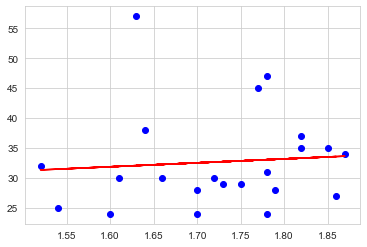

In [19]:
new_model2 = LinearRegression(n_jobs=-1)   
new_model2.fit(X, y)

plt.scatter(X, y, color='b')
plt.plot(X, new_model2.predict(X), color='red')

In [20]:
# ¿Es una buena técnica para este tipo de problemas? ¿Por qué?

In [21]:
# No, 

In [22]:
# ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?

In [23]:
# separamos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [24]:
lm = LinearRegression(n_jobs=-1)  
lm.fit(X_test, y_test)
lm.score(X_test, y_test) *100

3.549573246014226

In [25]:
predictions = lm.predict(X_test)

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.051360781577111
MSE: 5.01542219120726
RMSE: 2.239513829206522


In [27]:
# cuanto mas alto sea el RMSE en relación a MAE, mas outliers hay

In [15]:
# Representa la matriz de correlación, ¿los datos están correlacionados?

In [34]:
import pandas as pd 
d = {"edad":edad, "altura":altura}
df = pd.DataFrame(data=d)

<AxesSubplot:>

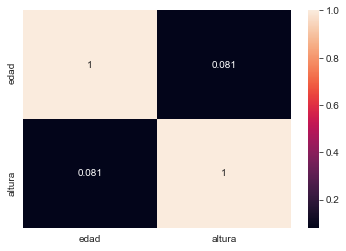

In [35]:
sns.heatmap(df.corr(), annot = True)

In [16]:
# ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad?

In [42]:
doble_altura = []
for elem in altura:
    doble_altura.append(elem*2)

doble_altura = np.array(doble_altura).reshape(-1,1)

In [ ]:
# x = altura
# la y no es la de antes, tiene que ser la original. usar ramdon estate

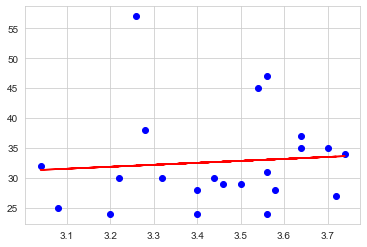

In [43]:
new_model2 = LinearRegression(n_jobs=-1)   
new_model2.fit(doble_altura, y)

plt.scatter(doble_altura, y, color='b')
plt.plot(doble_altura, new_model2.predict(doble_altura), color='red')